In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

In [250]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [251]:
import os
os.chdir('/content/drive/MyDrive/새싹2기/python_DA/data')

# [1] 시간 데이터 다루기

In [252]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2026, 1, 16, 6, 42, 0, 670272)

In [253]:
now.year

2026

In [254]:
now.month

1

In [255]:
now.day

16

In [256]:
now.second

0

In [257]:
now.hour

6

In [258]:
now.weekday()

4

In [259]:
from dateutil.parser import parse
parse('2025-03-27')

datetime.datetime(2025, 3, 27, 0, 0)

In [260]:
parse('2025/03/27')

datetime.datetime(2025, 3, 27, 0, 0)

In [261]:
parse('25-03-27')

datetime.datetime(2027, 3, 25, 0, 0)

In [262]:
datetime(2025,3,27)

datetime.datetime(2025, 3, 27, 0, 0)

In [263]:
from dateutil import tz

utc_time = datetime.now(tz=tz.tzutc())
utc_time

datetime.datetime(2026, 1, 16, 6, 42, 0, 876454, tzinfo=tzutc())

In [264]:
kst = tz.gettz("Asia/Seoul")
utc_time.astimezone(kst)

datetime.datetime(2026, 1, 16, 15, 42, 0, 876454, tzinfo=tzfile('/usr/share/zoneinfo/Asia/Seoul'))

In [265]:
from dateutil.relativedelta import relativedelta

datetime(2026, 1, 31) + relativedelta(months=1)

datetime.datetime(2026, 2, 28, 0, 0)

In [266]:
end_date = datetime(2026, 3, 27)
now = datetime.now(tz=kst)

In [267]:
end_date

datetime.datetime(2026, 3, 27, 0, 0)

In [268]:
now

datetime.datetime(2026, 1, 16, 15, 42, 0, 922721, tzinfo=tzfile('/usr/share/zoneinfo/Asia/Seoul'))

In [269]:
import pandas as pd

df = pd.DataFrame({
    'user_id': [101, 101, 101, 101, 101, 102, 102, 103, 103],
    'event_time': [
        '2024-02-01 09:10:00',
        '2024-02-01 09:25:00',
        '2024-02-03 21:40:00',
        '2024-02-05 11:00:00',
        '2024-02-07 11:00:00',
        '2024-02-01 10:05:00',
        '2024-02-07 08:50:00',
        '2024-02-05 14:00:00',
        '2024-02-05 14:03:00'
    ],
    'event_type': [
        'login', 'logout', 'purchase','login','purchase',
        'login', 'purchase',
        'login', 'logout'
    ],
    'amount': [0, 0, 12000, 0, 14000, 0, 25000, 0, 0]
})

df

,user_id,event_time,event_type,amount
0,101,2024-02-01 09:10:00,login,0
1,101,2024-02-01 09:25:00,logout,0
2,101,2024-02-03 21:40:00,purchase,12000
3,101,2024-02-05 11:00:00,login,0
4,101,2024-02-07 11:00:00,purchase,14000
5,102,2024-02-01 10:05:00,login,0
6,102,2024-02-07 08:50:00,purchase,25000
7,103,2024-02-05 14:00:00,login,0
8,103,2024-02-05 14:03:00,logout,0


In [270]:
df.dtypes

,0
user_id,int64
event_time,object
event_type,object
amount,int64


In [271]:
pd.to_datetime(df['event_time'])

,event_time
0,2024-02-01 09:10:00
1,2024-02-01 09:25:00
2,2024-02-03 21:40:00
3,2024-02-05 11:00:00
4,2024-02-07 11:00:00
5,2024-02-01 10:05:00
6,2024-02-07 08:50:00
7,2024-02-05 14:00:00
8,2024-02-05 14:03:00


In [272]:
df['event_time'] = pd.to_datetime(df['event_time'])
df.dtypes

,0
user_id,int64
event_time,datetime64[ns]
event_type,object
amount,int64


In [273]:
# df['event_time'].hour

In [274]:
df['event_time'].dt.hour

,event_time
0,9
1,9
2,21
3,11
4,11
5,10
6,8
7,14
8,14


In [275]:
df['event_time'].dt.weekday

,event_time
0,3
1,3
2,5
3,0
4,2
5,3
6,2
7,0
8,0


In [276]:
df['weekday'] = df['event_time'].dt.weekday

In [277]:
df['weekday'] = df['weekday'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'})

In [278]:
df['hour'] = df['event_time'].dt.hour

In [279]:
df['hour']

,hour
0,9
1,9
2,21
3,11
4,11
5,10
6,8
7,14
8,14


In [280]:
user_df = pd.DataFrame({'user_id':[101,102,103],
                        'signup_date':['2024-01-20','2024-01-10','2024-01-19']})
user_df

,user_id,signup_date
0,101,2024-01-20
1,102,2024-01-10
2,103,2024-01-19


In [281]:
# df = df.merge(user_df, on='user_id', how='left')

In [282]:
# df['signup_date'] = pd.to_datetime(df['signup_date'])

In [283]:
# df['event_time'] - df['singup_date']

In [284]:
user101 = df[df['user_id'] == 101].copy()
user101

,user_id,event_time,event_type,amount,weekday,hour
0,101,2024-02-01 09:10:00,login,0,Thur,9
1,101,2024-02-01 09:25:00,logout,0,Thur,9
2,101,2024-02-03 21:40:00,purchase,12000,Sat,21
3,101,2024-02-05 11:00:00,login,0,Mon,11
4,101,2024-02-07 11:00:00,purchase,14000,Wed,11


In [285]:
user101['prev_amount'] = user101['amount'].shift(1)
user101

,user_id,event_time,event_type,amount,weekday,hour,prev_amount
0,101,2024-02-01 09:10:00,login,0,Thur,9,NaN
1,101,2024-02-01 09:25:00,logout,0,Thur,9,0.0
2,101,2024-02-03 21:40:00,purchase,12000,Sat,21,0.0
3,101,2024-02-05 11:00:00,login,0,Mon,11,12000.0
4,101,2024-02-07 11:00:00,purchase,14000,Wed,11,0.0


## 실습(8)  - 시간데이터 다루기


pickup 컬럼을 datetime 자료형으로 바꾸고, weekday를 추출하여 weekday 컬럼을 만드세요.

In [286]:
taxi = sns.load_dataset('taxis')
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [287]:
taxi.shape

(6433, 14)

In [288]:
taxi.dtypes

,0
pickup,datetime64[ns]
dropoff,datetime64[ns]
passengers,int64
distance,float64
fare,float64
tip,float64
tolls,float64
total,float64
color,object
payment,object


In [289]:
taxi['pickup'] = pd.to_datetime(taxi['pickup'])
taxi.dtypes

,0
pickup,datetime64[ns]
dropoff,datetime64[ns]
passengers,int64
distance,float64
fare,float64
tip,float64
tolls,float64
total,float64
color,object
payment,object


In [290]:
taxi['weekday'] = taxi['pickup'].dt.weekday
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,weekday
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,5
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,6
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,5


pickup과 dropoff의 시간차를 확인하여, 소요 시간의 컬럼을 만드세요.

In [291]:
taxi['take_time'] = taxi['dropoff'] - taxi['pickup']
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,weekday,take_time
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,5,0 days 00:06:15
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0,0 days 00:07:05
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2,0 days 00:07:24
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,6,0 days 00:25:52
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,5,0 days 00:09:32



주말 여부인 경우만 필터링하여, weekend_df를 만드세요.

In [292]:
weekend_df = taxi[taxi['pickup'].dt.weekday >= 5]
weekend_df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,weekday,take_time
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,5,0 days 00:06:15
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,6,0 days 00:25:52
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,5,0 days 00:09:32
8,2019-03-23 11:48:50,2019-03-23 12:06:14,1,3.63,15.0,1.00,0.0,19.30,yellow,credit card,East Harlem South,Midtown Center,Manhattan,Manhattan,5,0 days 00:17:24
10,2019-03-16 10:02:25,2019-03-16 10:22:29,1,3.90,17.0,0.00,0.0,17.80,yellow,cash,LaGuardia Airport,Astoria,Queens,Queens,5,0 days 00:20:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,2019-03-30 20:52:15,2019-03-30 20:59:55,1,1.70,8.0,0.00,0.0,9.30,green,cash,Central Harlem,Central Harlem North,Manhattan,Manhattan,5,0 days 00:07:40
6427,2019-03-23 18:26:09,2019-03-23 18:49:12,1,7.07,20.0,0.00,0.0,20.00,green,cash,Parkchester,East Harlem South,Bronx,Manhattan,5,0 days 00:23:03
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,6,0 days 00:03:34
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,6,0 days 00:56:23


주말 운행 건수와 주말 요금의 평균을 확인하세요.

In [293]:
# 주말 운행 건수
count = weekend_df.shape[0]
count

1914

In [294]:
# 주말 요금의 평균
avg = weekend_df.groupby('weekday')['total'].mean().reset_index().round(2)
avg.index = ['Sat','Sun']
avg

,weekday,total
Sat,5,17.50
Sun,6,17.77


요일별 운행 건수 및 평균 요금을 확인하세요.

In [295]:
day = taxi.groupby('weekday')['fare'].agg(['count', 'mean']).round(2)
day.index = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
day

,count,mean
Mon,708,13.38
Tue,825,13.33
Wed,966,13.55
Thur,905,13.30
Fri,1115,13.12
Sat,1046,12.49
Sun,868,12.59


# [2] 시간 데이터 처리

In [296]:
user_df = user101.set_index('event_time')
user_df

,user_id,event_type,amount,weekday,hour,prev_amount
event_time,,,,,,
2024-02-01 09:10:00,101,login,0,Thur,9,NaN
2024-02-01 09:25:00,101,logout,0,Thur,9,0.0
2024-02-03 21:40:00,101,purchase,12000,Sat,21,0.0
2024-02-05 11:00:00,101,login,0,Mon,11,12000.0
2024-02-07 11:00:00,101,purchase,14000,Wed,11,0.0


In [297]:
user_df.index.hour

Index([9, 9, 21, 11, 11], dtype='int32', name='event_time')

## (1) 데이터 확인하기

In [298]:
# taxi.drop(['weekday'], axis=1, inplace=True)
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,weekday,take_time
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,5,0 days 00:06:15
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0,0 days 00:07:05
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2,0 days 00:07:24
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,6,0 days 00:25:52
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,5,0 days 00:09:32


In [299]:
taxi.dtypes

,0
pickup,datetime64[ns]
dropoff,datetime64[ns]
passengers,int64
distance,float64
fare,float64
tip,float64
tolls,float64
total,float64
color,object
payment,object


In [300]:
pd.to_datetime(taxi['pickup'])
taxi['pickup'].astype('datetime64[ns]')

,pickup
0,2019-03-23 20:21:09
1,2019-03-04 16:11:55
2,2019-03-27 17:53:01
3,2019-03-10 01:23:59
4,2019-03-30 13:27:42
...,...
6428,2019-03-31 09:51:53
6429,2019-03-31 17:38:00
6430,2019-03-23 22:55:18
6431,2019-03-04 10:09:25


In [301]:
taxi = taxi.set_index('pickup').sort_index()

In [302]:
taxi.head()

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,weekday,take_time
pickup,,,,,,,,,,,,,,,
2019-02-28 23:29:03,2019-02-28 23:32:35,1,0.90,5.0,0.0,0.0,6.3,green,cash,Old Astoria,Long Island City/Queens Plaza,Queens,Queens,3,0 days 00:03:32
2019-03-01 00:03:29,2019-03-01 00:13:32,3,2.16,10.0,2.0,0.0,15.8,yellow,credit card,Lincoln Square East,Upper East Side North,Manhattan,Manhattan,4,0 days 00:10:03
2019-03-01 00:08:32,2019-03-01 00:29:47,3,7.35,22.5,1.0,0.0,27.3,yellow,credit card,East Chelsea,Mott Haven/Port Morris,Manhattan,Bronx,4,0 days 00:21:15
2019-03-01 00:15:53,2019-03-01 00:47:58,1,7.00,25.5,7.3,0.0,36.6,yellow,credit card,West Village,Astoria,Manhattan,Queens,4,0 days 00:32:05
2019-03-01 00:29:22,2019-03-01 00:32:48,4,0.74,4.5,1.0,0.0,9.3,yellow,credit card,Meatpacking/West Village West,Meatpacking/West Village West,Manhattan,Manhattan,4,0 days 00:03:26


In [303]:
taxi.index.dtype

dtype('<M8[ns]')

In [304]:
taxi.index.is_monotonic_increasing

True

In [305]:
taxi.at_time('08:00')

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,weekday,take_time
pickup,,,,,,,,,,,,,,,


In [306]:
morning = taxi.between_time('07:00','09:00').copy()
morning

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,weekday,take_time
pickup,,,,,,,,,,,,,,,
2019-03-01 07:00:35,2019-03-01 07:05:11,1,0.86,5.0,1.66,0.0,9.96,yellow,credit card,Sutton Place/Turtle Bay North,Midtown East,Manhattan,Manhattan,4,0 days 00:04:36
2019-03-01 07:06:20,2019-03-01 07:09:34,5,0.66,4.5,1.56,0.0,9.36,yellow,credit card,Lenox Hill West,Upper East Side North,Manhattan,Manhattan,4,0 days 00:03:14
2019-03-01 07:15:56,2019-03-01 07:19:31,1,0.40,4.0,0.00,0.0,7.30,yellow,credit card,Lenox Hill West,Lenox Hill East,Manhattan,Manhattan,4,0 days 00:03:35
2019-03-01 07:16:19,2019-03-01 07:23:47,1,2.00,8.0,2.25,0.0,13.55,yellow,credit card,Gramercy,Midtown South,Manhattan,Manhattan,4,0 days 00:07:28
2019-03-01 07:18:18,2019-03-01 07:30:57,1,2.06,10.0,0.00,0.0,13.30,yellow,cash,Kips Bay,Lenox Hill East,Manhattan,Manhattan,4,0 days 00:12:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-31 07:35:53,2019-03-31 07:47:11,5,2.96,11.5,1.00,0.0,15.80,yellow,credit card,Lincoln Square West,Yorkville West,Manhattan,Manhattan,6,0 days 00:11:18
2019-03-31 07:52:57,2019-03-31 07:58:31,1,1.48,6.5,0.00,0.0,9.80,yellow,cash,Meatpacking/West Village West,TriBeCa/Civic Center,Manhattan,Manhattan,6,0 days 00:05:34
2019-03-31 08:02:32,2019-03-31 08:08:13,2,1.46,7.0,2.06,0.0,12.36,yellow,credit card,Hudson Sq,Battery Park City,Manhattan,Manhattan,6,0 days 00:05:41


In [307]:
evening = taxi.between_time('18:00','19:00').copy()
evening['fare'].mean()

np.float64(12.35535885167464)

In [308]:
morning['fare_cumsum'] = morning['fare'].cumsum()

In [309]:
morning[['fare','fare_cumsum']].head()

,fare,fare_cumsum
pickup,,
2019-03-01 07:00:35,5.0,5.0
2019-03-01 07:06:20,4.5,9.5
2019-03-01 07:15:56,4.0,13.5
2019-03-01 07:16:19,8.0,21.5
2019-03-01 07:18:18,10.0,31.5


In [310]:
tip = sns.load_dataset('tips')
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [311]:
tip['tip'].cumsum()

,tip
0,1.01
1,2.67
2,6.17
3,9.48
4,13.09
...,...
239,722.83
240,724.83
241,726.83
242,728.58


In [312]:
morning['fare_cummax'] = morning['fare'].cummax()
morning['fare_cummin'] = morning['fare'].cummin()

In [313]:
morning[['fare','fare_cumsum','fare_cummax', 'fare_cummin']].head()

,fare,fare_cumsum,fare_cummax,fare_cummin
pickup,,,,
2019-03-01 07:00:35,5.0,5.0,5.0,5.0
2019-03-01 07:06:20,4.5,9.5,5.0,4.5
2019-03-01 07:15:56,4.0,13.5,5.0,4.0
2019-03-01 07:16:19,8.0,21.5,8.0,4.0
2019-03-01 07:18:18,10.0,31.5,10.0,4.0


In [314]:
morning['fare_cumave'] = (morning['fare'].cumsum() / range(1, len(morning) + 1))

In [315]:
morning[['fare','fare_cumsum','fare_cummax','fare_cumave']].head()

,fare,fare_cumsum,fare_cummax,fare_cumave
pickup,,,,
2019-03-01 07:00:35,5.0,5.0,5.0,5.000
2019-03-01 07:06:20,4.5,9.5,5.0,4.750
2019-03-01 07:15:56,4.0,13.5,5.0,4.500
2019-03-01 07:16:19,8.0,21.5,8.0,5.375
2019-03-01 07:18:18,10.0,31.5,10.0,6.300


(array([17956., 17960., 17964., 17968., 17972., 17976., 17980., 17984.,
        17987.]),
 [Text(17956.0, 0, '2019-03-01'),
  Text(17960.0, 0, '2019-03-05'),
  Text(17964.0, 0, '2019-03-09'),
  Text(17968.0, 0, '2019-03-13'),
  Text(17972.0, 0, '2019-03-17'),
  Text(17976.0, 0, '2019-03-21'),
  Text(17980.0, 0, '2019-03-25'),
  Text(17984.0, 0, '2019-03-29'),
  Text(17987.0, 0, '2019-04-01')])

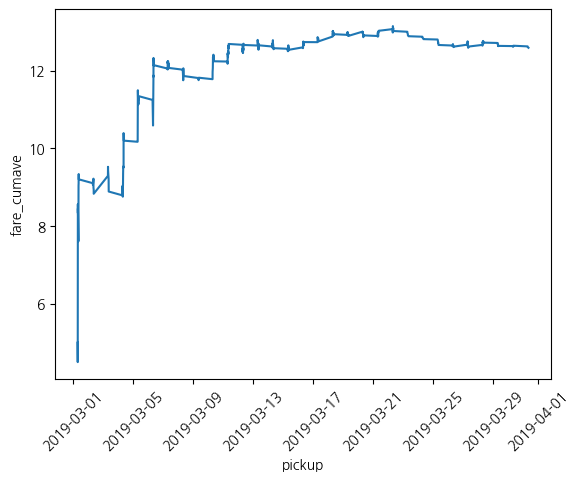

In [316]:
sns.lineplot(data=morning, y='fare_cumave', x=morning.index)
plt.xticks(rotation=45)

In [317]:
morning['fare'].mean()

np.float64(12.586704119850186)

In [318]:
morning['fare'].describe()

,fare
count,534.000000
mean,12.586704
std,10.779767
min,2.500000
25%,6.000000
50%,9.000000
75%,14.375000
max,81.860000


In [319]:
morning.head()

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,weekday,take_time,fare_cumsum,fare_cummax,fare_cummin,fare_cumave
pickup,,,,,,,,,,,,,,,,,,,
2019-03-01 07:00:35,2019-03-01 07:05:11,1,0.86,5.0,1.66,0.0,9.96,yellow,credit card,Sutton Place/Turtle Bay North,Midtown East,Manhattan,Manhattan,4,0 days 00:04:36,5.0,5.0,5.0,5.000
2019-03-01 07:06:20,2019-03-01 07:09:34,5,0.66,4.5,1.56,0.0,9.36,yellow,credit card,Lenox Hill West,Upper East Side North,Manhattan,Manhattan,4,0 days 00:03:14,9.5,5.0,4.5,4.750
2019-03-01 07:15:56,2019-03-01 07:19:31,1,0.40,4.0,0.00,0.0,7.30,yellow,credit card,Lenox Hill West,Lenox Hill East,Manhattan,Manhattan,4,0 days 00:03:35,13.5,5.0,4.0,4.500
2019-03-01 07:16:19,2019-03-01 07:23:47,1,2.00,8.0,2.25,0.0,13.55,yellow,credit card,Gramercy,Midtown South,Manhattan,Manhattan,4,0 days 00:07:28,21.5,8.0,4.0,5.375
2019-03-01 07:18:18,2019-03-01 07:30:57,1,2.06,10.0,0.00,0.0,13.30,yellow,cash,Kips Bay,Lenox Hill East,Manhattan,Manhattan,4,0 days 00:12:39,31.5,10.0,4.0,6.300


## (2) 결측치 처리

In [320]:
taxi.head()

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,weekday,take_time
pickup,,,,,,,,,,,,,,,
2019-02-28 23:29:03,2019-02-28 23:32:35,1,0.90,5.0,0.0,0.0,6.3,green,cash,Old Astoria,Long Island City/Queens Plaza,Queens,Queens,3,0 days 00:03:32
2019-03-01 00:03:29,2019-03-01 00:13:32,3,2.16,10.0,2.0,0.0,15.8,yellow,credit card,Lincoln Square East,Upper East Side North,Manhattan,Manhattan,4,0 days 00:10:03
2019-03-01 00:08:32,2019-03-01 00:29:47,3,7.35,22.5,1.0,0.0,27.3,yellow,credit card,East Chelsea,Mott Haven/Port Morris,Manhattan,Bronx,4,0 days 00:21:15
2019-03-01 00:15:53,2019-03-01 00:47:58,1,7.00,25.5,7.3,0.0,36.6,yellow,credit card,West Village,Astoria,Manhattan,Queens,4,0 days 00:32:05
2019-03-01 00:29:22,2019-03-01 00:32:48,4,0.74,4.5,1.0,0.0,9.3,yellow,credit card,Meatpacking/West Village West,Meatpacking/West Village West,Manhattan,Manhattan,4,0 days 00:03:26


In [321]:
taxi.duplicated().sum()

np.int64(0)

In [322]:
taxi.dtypes

,0
dropoff,datetime64[ns]
passengers,int64
distance,float64
fare,float64
tip,float64
tolls,float64
total,float64
color,object
payment,object
pickup_zone,object


In [323]:
taxi.isnull().sum()

,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44
pickup_zone,26


In [324]:
import numpy as np

taxi.iloc[0,3]= np.nan
taxi.iloc[4,3]= np.nan
taxi.head()

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,weekday,take_time
pickup,,,,,,,,,,,,,,,
2019-02-28 23:29:03,2019-02-28 23:32:35,1,0.90,NaN,0.0,0.0,6.3,green,cash,Old Astoria,Long Island City/Queens Plaza,Queens,Queens,3,0 days 00:03:32
2019-03-01 00:03:29,2019-03-01 00:13:32,3,2.16,10.0,2.0,0.0,15.8,yellow,credit card,Lincoln Square East,Upper East Side North,Manhattan,Manhattan,4,0 days 00:10:03
2019-03-01 00:08:32,2019-03-01 00:29:47,3,7.35,22.5,1.0,0.0,27.3,yellow,credit card,East Chelsea,Mott Haven/Port Morris,Manhattan,Bronx,4,0 days 00:21:15
2019-03-01 00:15:53,2019-03-01 00:47:58,1,7.00,25.5,7.3,0.0,36.6,yellow,credit card,West Village,Astoria,Manhattan,Queens,4,0 days 00:32:05
2019-03-01 00:29:22,2019-03-01 00:32:48,4,0.74,NaN,1.0,0.0,9.3,yellow,credit card,Meatpacking/West Village West,Meatpacking/West Village West,Manhattan,Manhattan,4,0 days 00:03:26


In [325]:
taxi['fare'].ffill()

# 1번째 위치한 결측은 0번째 위치한 값으로 채워짐
# 5번째 위치한 결측은 4번째 위치한 값으로 채워짐

,fare
pickup,
2019-02-28 23:29:03,NaN
2019-03-01 00:03:29,10.0
2019-03-01 00:08:32,22.5
2019-03-01 00:15:53,25.5
2019-03-01 00:29:22,25.5
...,...
2019-03-31 22:13:37,7.5
2019-03-31 22:32:27,3.5
2019-03-31 22:51:53,4.5


In [326]:
taxi['fare'].bfill()

# 0번째 위치한 결측은 1번째 위치한 값으로 채워짐
# 4번째 위치한 결측은 5번째 위치한 값으로 채워짐

,fare
pickup,
2019-02-28 23:29:03,10.0
2019-03-01 00:03:29,10.0
2019-03-01 00:08:32,22.5
2019-03-01 00:15:53,25.5
2019-03-01 00:29:22,7.0
...,...
2019-03-31 22:13:37,7.5
2019-03-31 22:32:27,3.5
2019-03-31 22:51:53,4.5


In [327]:
taxi['fare'].interpolate(method='linear')

,fare
pickup,
2019-02-28 23:29:03,NaN
2019-03-01 00:03:29,10.00
2019-03-01 00:08:32,22.50
2019-03-01 00:15:53,25.50
2019-03-01 00:29:22,16.25
...,...
2019-03-31 22:13:37,7.50
2019-03-31 22:32:27,3.50
2019-03-31 22:51:53,4.50


In [328]:
(taxi.iloc[3,3] + taxi.iloc[5,3])/2

np.float64(16.25)

In [329]:
taxi['fare'].interpolate(method='time')

,fare
pickup,
2019-02-28 23:29:03,NaN
2019-03-01 00:03:29,10.000000
2019-03-01 00:08:32,22.500000
2019-03-01 00:15:53,25.500000
2019-03-01 00:29:22,8.980684
...,...
2019-03-31 22:13:37,7.500000
2019-03-31 22:32:27,3.500000
2019-03-31 22:51:53,4.500000


## 실습(9) - 시계열 데이터 전처리

In [330]:
dow = pd.read_csv('dowjones.csv')
dow.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45



데이터의 정보를 확인하고, 결측치 여부를 확인하세요.

In [331]:
dow.shape

(649, 2)

In [332]:
dow.dtypes

,0
Date,object
Price,float64


In [333]:
dow.isnull().sum()

,0
Date,0
Price,64



결측치가 있는 행을 삭제해 보세요.

In [334]:
nn = dow.dropna()


결측치가 있는 행을 평균값으로 대체해 보세요.

In [335]:
dow['Price'].mean()

np.float64(285.9419829059829)

In [336]:
# dow_avg = dow['Price'].fillna(dow['Price'].mean())
dow[dow['Price'].isna()].index

Index([ 14,  18,  48,  50,  52,  64,  75,  85, 122, 157, 159, 165, 175, 190,
       205, 206, 235, 239, 240, 245, 249, 251, 268, 271, 272, 303, 306, 337,
       343, 355, 375, 384, 386, 392, 395, 400, 405, 422, 436, 439, 449, 470,
       477, 480, 499, 505, 506, 509, 528, 531, 532, 534, 538, 564, 578, 580,
       592, 593, 603, 625, 628, 643, 644, 646],
      dtype='int64')

In [337]:
dow['Price'].mode()

,Price
0,75.70
1,81.05
2,93.30
3,97.00
4,98.50
5,103.55
6,105.80
7,120.10


<Axes: xlabel='Date', ylabel='Price'>

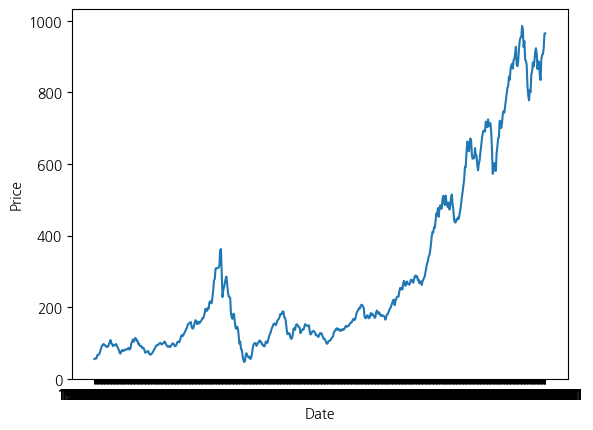

In [344]:
sns.lineplot(data=nn, x='Date', y='Price')

Date를 시계열 인덱스로 바꾸고, 선형 보간을 해 보세요.

In [345]:
dow['Date'] = pd.to_datetime(dow['Date'])
dow.sort_index(inplace=True)
dow.dtypes

,0
Date,datetime64[ns]
Price,float64


In [346]:
dow.isnull().sum()

,0
Date,0
Price,0


In [347]:
dow['Price'] = dow['Price'].interpolate(method='linear')
dow[dow['Price'].isna()].index

Index([], dtype='int64')

In [348]:
print(dow['Price'].describe())
print(dow['Price'].mode())

count    649.000000
mean     290.767342
std      256.102448
min       46.850000
25%      106.900000
50%      172.070000
75%      436.730000
max      985.930000
Name: Price, dtype: float64
0     75.70
1     81.05
2     93.30
3     97.00
4     98.50
5    103.55
6    105.80
7    120.10
Name: Price, dtype: float64


# [3] 시간 데이터 요약하기

In [352]:
# taxi.drop(['weekday', 'take_time'], axis=1, inplace=True)
taxi.head()

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
pickup,,,,,,,,,,,,,
2019-02-28 23:29:03,2019-02-28 23:32:35,1,0.90,NaN,0.0,0.0,6.3,green,cash,Old Astoria,Long Island City/Queens Plaza,Queens,Queens
2019-03-01 00:03:29,2019-03-01 00:13:32,3,2.16,10.0,2.0,0.0,15.8,yellow,credit card,Lincoln Square East,Upper East Side North,Manhattan,Manhattan
2019-03-01 00:08:32,2019-03-01 00:29:47,3,7.35,22.5,1.0,0.0,27.3,yellow,credit card,East Chelsea,Mott Haven/Port Morris,Manhattan,Bronx
2019-03-01 00:15:53,2019-03-01 00:47:58,1,7.00,25.5,7.3,0.0,36.6,yellow,credit card,West Village,Astoria,Manhattan,Queens
2019-03-01 00:29:22,2019-03-01 00:32:48,4,0.74,NaN,1.0,0.0,9.3,yellow,credit card,Meatpacking/West Village West,Meatpacking/West Village West,Manhattan,Manhattan


In [355]:
taxi.index.is_monotonic_increasing

True

In [356]:
taxi.resample('D').size()

,0
pickup,
2019-02-28,1
2019-03-01,241
2019-03-02,198
2019-03-03,169
2019-03-04,171
2019-03-05,228
2019-03-06,257
2019-03-07,218
2019-03-08,235


In [357]:
taxi.resample('W').size()

,0
pickup,
2019-03-03,609
2019-03-10,1498
2019-03-17,1530
2019-03-24,1415
2019-03-31,1381


In [360]:
parse('2019-03-03').weekday()

6

In [362]:
taxi_fare = taxi['fare'].resample('D').sum()
taxi_fare.head()

,fare
pickup,
2019-02-28,0.00
2019-03-01,2942.47
2019-03-02,2358.00
2019-03-03,2187.89
2019-03-04,2335.74


In [363]:
taxi.resample('h')['fare'].size()

,fare
pickup,
2019-02-28 23:00:00,1
2019-03-01 00:00:00,8
2019-03-01 01:00:00,1
2019-03-01 02:00:00,3
2019-03-01 03:00:00,0
...,...
2019-03-31 19:00:00,10
2019-03-31 20:00:00,12
2019-03-31 21:00:00,8


In [364]:
taxi.resample('Q').size()

/tmp/ipython-input-3611442677.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  taxi.resample('Q').size()


,0
pickup,
2019-03-31,6433


In [366]:
taxi_fare.rolling(window=7).mean()

,fare
pickup,
2019-02-28,NaN
2019-03-01,NaN
2019-03-02,NaN
2019-03-03,NaN
2019-03-04,NaN
2019-03-05,NaN
2019-03-06,2318.824286
2019-03-07,2732.915714
2019-03-08,2765.205714


In [367]:
taxi_fare = taxi_fare.to_frame()

In [377]:
# taxi_fare['fare_7d_avg'] = taxi_fare.rolling(window=7).mean()

In [372]:
taxi_fare.head()

,fare,fare_7d_avg
pickup,,
2019-02-28,0.00,NaN
2019-03-01,2942.47,NaN
2019-03-02,2358.00,NaN
2019-03-03,2187.89,NaN
2019-03-04,2335.74,NaN


In [375]:
taxi_fare['fare_3d_avg'] = taxi_fare['fare'].rolling(window=3, min_periods=1).mean()
taxi_fare.head()

,fare,fare_7d_avg,fare_3d_avg
pickup,,,
2019-02-28,0.00,NaN,0.000000
2019-03-01,2942.47,NaN,1471.235000
2019-03-02,2358.00,NaN,1766.823333
2019-03-03,2187.89,NaN,2496.120000
2019-03-04,2335.74,NaN,2293.876667


## 실습(10) - 시계열 분석 종합

요일별 평균 택시 운행 건수를 구해보세요.
- pickup 기준
- 요일(월~일) 단위로 요약
- 요일 순서가 자연스럽게 보이도록 정렬

In [420]:
taxi = sns.load_dataset('taxis')
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [421]:
taxi.dtypes

,0
pickup,datetime64[ns]
dropoff,datetime64[ns]
passengers,int64
distance,float64
fare,float64
tip,float64
tolls,float64
total,float64
color,object
payment,object


In [422]:
taxi['weekday'] = taxi['pickup'].dt.weekday

In [425]:
weekday_count = (taxi.groupby('weekday').size().rename('count'))
weekday_count.index= ['Mon','Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
weekday_count

,count
Mon,708
Tue,825
Wed,966
Thur,905
Fri,1115
Sat,1046
Sun,868



요일별 결과를 보고 다음 질문에 답해보세요.
평일과 주말의 차이가 있는가?
특정 요일이 유독 튀는가?

Text(0.5, 1.0, '요일별 택시 이용량')

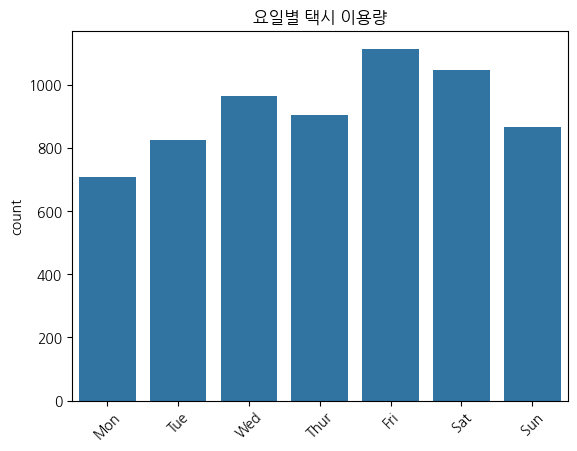

In [430]:
sns.barplot(weekday_count)
plt.xticks(rotation=45)
plt.title('요일별 택시 이용량')

# 금토가 가장 많고, 월요일이 적음
# 아마 금토에 약속을 하고 늦게 귀가 하는 경우가 많아서 그런것으로 보이며, 월요일은 집에 일찍일찍 들어가서?

하루를 쪼개서 보는 관점”연습
> 📝시간대(0~23시)별 평균 요금(fare) 을 구해보세요.
- pickup 기준
- 시간(hour) 단위
- 평균 요금 기준

In [432]:
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,weekday
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,5
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,6
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,5


In [442]:
taxi['hourly'] = taxi['pickup'].dt.hour

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

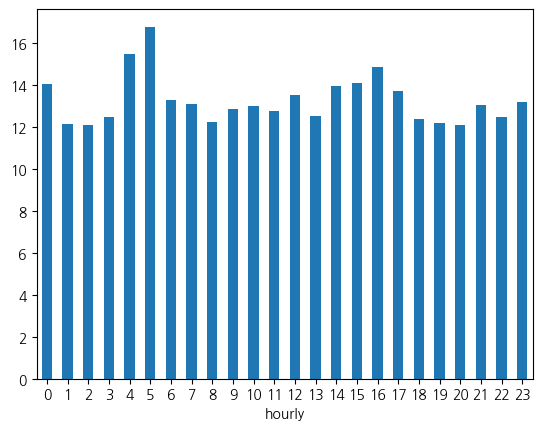

In [455]:
hourly_fare = taxi.groupby('hourly')['fare'].mean().round(2)
hourly_fare.plot.bar()
plt.xticks(rotation=0)

In [456]:
hourly_fare

,fare
hourly,
0,14.04
1,12.15
2,12.07
3,12.47
4,15.45
5,16.77
6,13.30
7,13.10
8,12.22


>📝 다음 질문을 스스로 던져보세요.
- 새벽 시간대 요금은 왜 높거나 낮을까?
- 단순히 “요금”이 아니라 이동 거리와 연관이 있을까?
> 👉 시간 요약은 항상 “해석 질문”과 함께

In [ ]:
# 새벽 시간에 할증붙음
# 특히 새벽 4~5시에 출발하는 택시의 경우 장거리 택시가 꽤 있으며, 장거리 택시는 요금이 높이 나올 확률 + 할증이 붙음

출근 시간대(07:00~09:00) 와 심야 시간대(00:00~04:00) 를 각각 필터링하세요.

- 필터링한 두 시간대의 요금의 평균을 비교해 보세요.

In [463]:
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,weekday,hourly
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,5,20
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0,16
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2,17
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,6,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,5,13


In [467]:
time = taxi.sort_values('pickup').set_index('pickup')
time.head()

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,weekday,hourly
pickup,,,,,,,,,,,,,,,
2019-02-28 23:29:03,2019-02-28 23:32:35,1,0.90,5.0,0.0,0.0,6.3,green,cash,Old Astoria,Long Island City/Queens Plaza,Queens,Queens,3,23
2019-03-01 00:03:29,2019-03-01 00:13:32,3,2.16,10.0,2.0,0.0,15.8,yellow,credit card,Lincoln Square East,Upper East Side North,Manhattan,Manhattan,4,0
2019-03-01 00:08:32,2019-03-01 00:29:47,3,7.35,22.5,1.0,0.0,27.3,yellow,credit card,East Chelsea,Mott Haven/Port Morris,Manhattan,Bronx,4,0
2019-03-01 00:15:53,2019-03-01 00:47:58,1,7.00,25.5,7.3,0.0,36.6,yellow,credit card,West Village,Astoria,Manhattan,Queens,4,0
2019-03-01 00:29:22,2019-03-01 00:32:48,4,0.74,4.5,1.0,0.0,9.3,yellow,credit card,Meatpacking/West Village West,Meatpacking/West Village West,Manhattan,Manhattan,4,0


In [470]:
working = time.between_time('07:00','09:00')
exiting = time.between_time('00:00','04:00')
print(working['fare'].mean().round(2))
print(exiting['fare'].mean().round(2))

# 00~04시에는 할증이 붙으며 퇴근보다 출근 시간이 시간대가 짧아 사람이 더 몰리고 차가 막히므로 택시 이용량이 줄어들것으로 예상

12.59
12.98


일별 총 요금 데이터를 만든 뒤, 7일 이동 평균을 계산하세요.

In [475]:
daily_fare = time['fare'].resample('D').sum()
daily_fare.head()

,fare
pickup,
2019-02-28,5.00
2019-03-01,2946.97
2019-03-02,2358.00
2019-03-03,2187.89
2019-03-04,2335.74


<Axes: xlabel='pickup'>

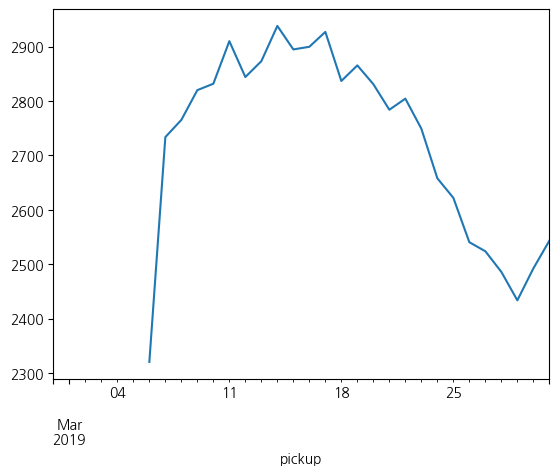

In [478]:
daily_fare_7d = daily_fare.rolling(window=7).mean().plot.line()
daily_fare_7d